# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/listings_wo_outliers.csv')

In [3]:
# Drop non-numerical variables 
FEATURES = ['Length','Year','Beam','Draft','Is_Mono','Is_Diesel','Engine_Count','Cabins','Is_Inboard',
            'Year_Listed','Is_Fiberglass','Is_cruiser','Is_daysailer','Is_masthead_sloop','Is_Cutter',
            'Is_Ketch','Is_Excellent','Is_Fair','Is_Good','Is_Project_boat','Asking_Price_Adj']

df = df[FEATURES]

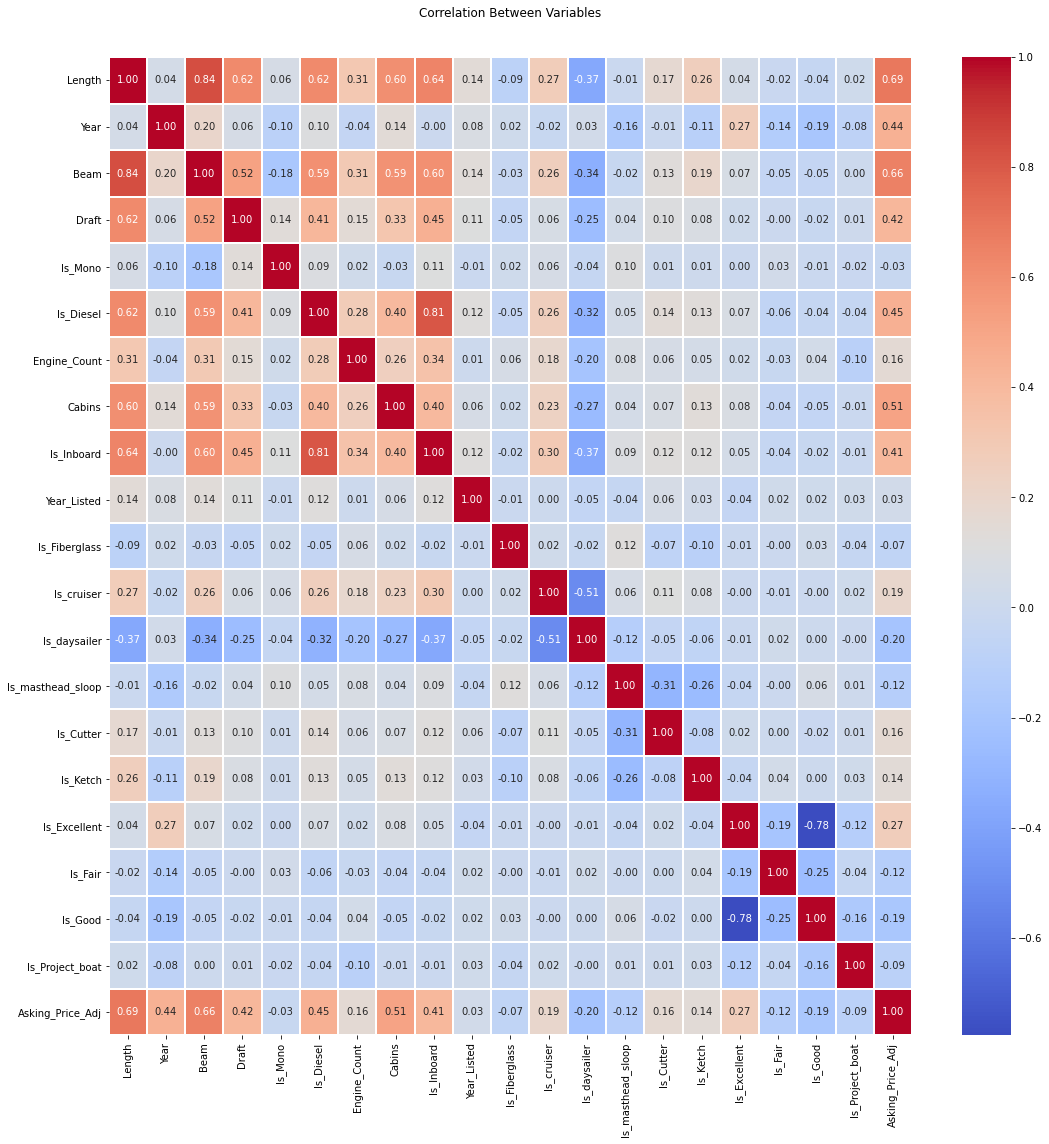

In [4]:
# Visualize the variables correlations

fig, ax = plt.subplots(figsize=(18, 18))
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot=True, fmt='.2f', linewidths=0.1)
plt.title("Correlation Between Variables", pad=40)
plt.savefig('Variables Correlations.png')

# Machine Learning: Regression Models

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor, SGDRegressor,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [6]:
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv')
y_test = pd.read_csv('data/y_test.csv')

## Perform GridSearch on Different Models

In [7]:
lasso = GridSearchCV(Lasso(),
                   param_grid={"alpha": [0.1,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]},scoring='r2',cv=5)

lasso.fit(X_train, y_train)

print(f"Best Lasso with params: {lasso.best_params_} and R2 score: {lasso.best_score_:.3f}")

Best Lasso with params: {'alpha': 4.0} and R2 score: 0.693


In [8]:
ridge = GridSearchCV(Ridge(),
                   param_grid={"alpha": [0.1,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]},scoring='r2',cv=5)

ridge.fit(X_train, y_train)

print(f"Best Ridge with params: {ridge.best_params_} and R2 score: {ridge.best_score_:.3f}")

Best Ridge with params: {'alpha': 4.0} and R2 score: 0.693


In [9]:
svr_linear = GridSearchCV(SVR(kernel="linear", epsilon=0.1),
                   param_grid={"C": [10, 100,1000]},
                   scoring='r2',cv=5)

svr_linear.fit(X_train, y_train)

print(f"Best Linear SVR with params: {svr_linear.best_params_} and R2 score: {svr_linear.best_score_:.3f}")

Best Linear SVR with params: {'C': 100} and R2 score: 0.660


In [10]:
# Due to long training time, the best parameters of degree & C is tested out manually with Brute-Force method
svr_poly = make_pipeline(StandardScaler(),SVR(kernel='poly',C=1000,degree=4,gamma='auto',epsilon=0.1,coef0=1)).fit(X_train,y_train)

best_score = np.mean(cross_val_score(svr_poly, X_test, y_test, cv=KFold(5, shuffle=True, random_state=42)))

print("Best Poly SVR with params: {'C': 1000, 'degree': 4} and R2 score:" + f"{best_score:.3f}")

Best Poly SVR with params: {'C': 1000, 'degree': 4} and R2 score:0.748


In [11]:
dtr = GridSearchCV(DecisionTreeRegressor(random_state=42),
                   param_grid={"max_depth": [10,25,40,55,70], "min_samples_leaf": [0.1,0.3,0.5,0.7,1]},
                   scoring='r2',cv=5)

dtr.fit(X_train, y_train)

print(f"Best Decision Tree Regressor with params: {dtr.best_params_} and R2 score: {dtr.best_score_:.3f}")

Best Decision Tree Regressor with params: {'max_depth': 10, 'min_samples_leaf': 1} and R2 score: 0.631


In [12]:
rfr = GridSearchCV(RandomForestRegressor(random_state=42),
                   param_grid={"n_estimators": [10,100,200,300,400,500,600,700,800]},
                   scoring='r2',cv=5)

rfr.fit(X_train, y_train)

print(f"Best Random Forest Regressor with params: {rfr.best_params_} and R2 score: {rfr.best_score_:.3f}")

Best Random Forest Regressor with params: {'n_estimators': 700} and R2 score: 0.790


In [13]:
# Get 5 fold cross validated r2 scores and root mean squared error for different models
models = [RandomForestRegressor(n_estimators=700, random_state=42),
         SVR(kernel='poly',C=1000,degree=4,gamma='auto',epsilon=0.1,coef0=1),
         Lasso(alpha=0.1),
         Ridge(alpha=0.1),
         LinearRegression(),
         DecisionTreeRegressor(max_depth=10, min_samples_leaf=1, random_state=42)]

scores = {}
for model in models:
    clf = make_pipeline(StandardScaler(),model).fit(X_train,y_train)
    scores[str(model).split('(')[0]] = {
        'CV-R2':cross_val_score(clf, X_test, y_test, cv=KFold(5, shuffle=True, random_state=42)),
        'RMSE':np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))
    }   
    
scores

{'RandomForestRegressor': {'CV-R2': array([0.75921848, 0.77423667, 0.75020045, 0.72804458, 0.77768675]),
  'RMSE': 17782.48521787331},
 'SVR': {'CV-R2': array([0.77149636, 0.70858654, 0.75475944, 0.71940999, 0.78342152]),
  'RMSE': 18381.16592693022},
 'Lasso': {'CV-R2': array([0.64837465, 0.67970875, 0.70489137, 0.65029118, 0.67363048]),
  'RMSE': 21782.874359283014},
 'Ridge': {'CV-R2': array([0.64836335, 0.67967814, 0.70492346, 0.65030493, 0.67364259]),
  'RMSE': 21782.854298611357},
 'LinearRegression': {'CV-R2': array([0.64837498, 0.67970522, 0.70488704, 0.65028987, 0.67362947]),
  'RMSE': 21782.9019986397},
 'DecisionTreeRegressor': {'CV-R2': array([0.50656373, 0.58500314, 0.58306047, 0.51849441, 0.60768642]),
  'RMSE': 22665.272282431997}}

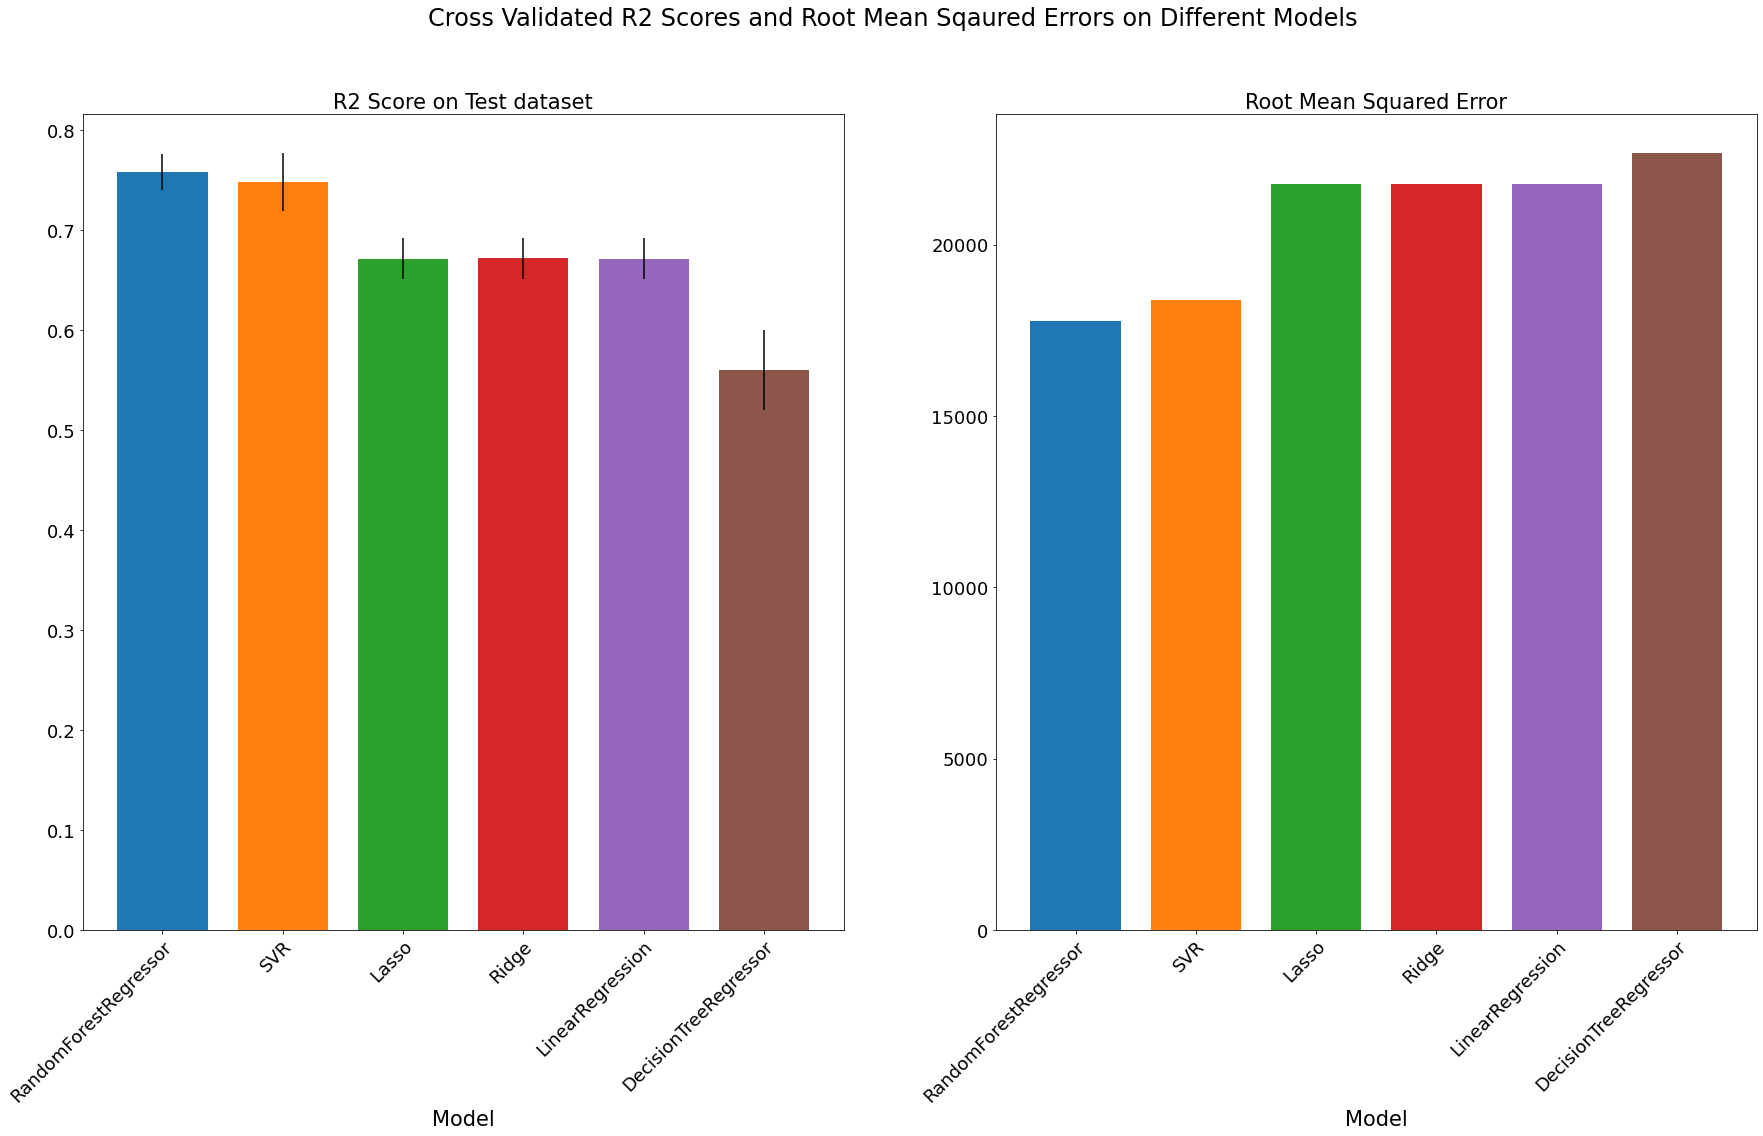

In [14]:
def plot_results(figure_title):
    # Visualize Cross Validated R2 Scores and Root Mean Sqaured Errors on Different Models
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(30, 15))

    plot_info = [("CV-R2", "R2 Score on Test dataset", ax1, None),
                ("RMSE", "Root Mean Squared Error", ax2, None)]
    
    x, width = np.arange(6), 0.75
    for key, title, ax, y_limit in plot_info:
        items = [scores[score][key] for score in scores]

        mape_cv_mean = [np.mean(np.abs(item)) for item in items]
        mape_cv_std = [np.std(item) for item in items]

        ax.bar(
            x=x,
            height=mape_cv_mean,
            width=width,
            yerr=mape_cv_std,
            color=["C0", "C1", "C2", "C3","C4","C5","C6"],
        )
        ax.set(
            xticks=x,
            ylim=y_limit)
        
        ax.set_xlabel("Model",fontsize = 21)
        ax.set_xticklabels([score for score in scores], fontsize=18,rotation=45, ha='right', rotation_mode='anchor') 
        ax.set_title(title,fontsize=21)
        ax.yaxis.set_tick_params(labelsize=18)
        
    fig.suptitle(figure_title,fontsize=24)
    plt.savefig('R2_RMSE.png',bbox_inches = 'tight') 

plot_results("Cross Validated R2 Scores and Root Mean Sqaured Errors on Different Models")


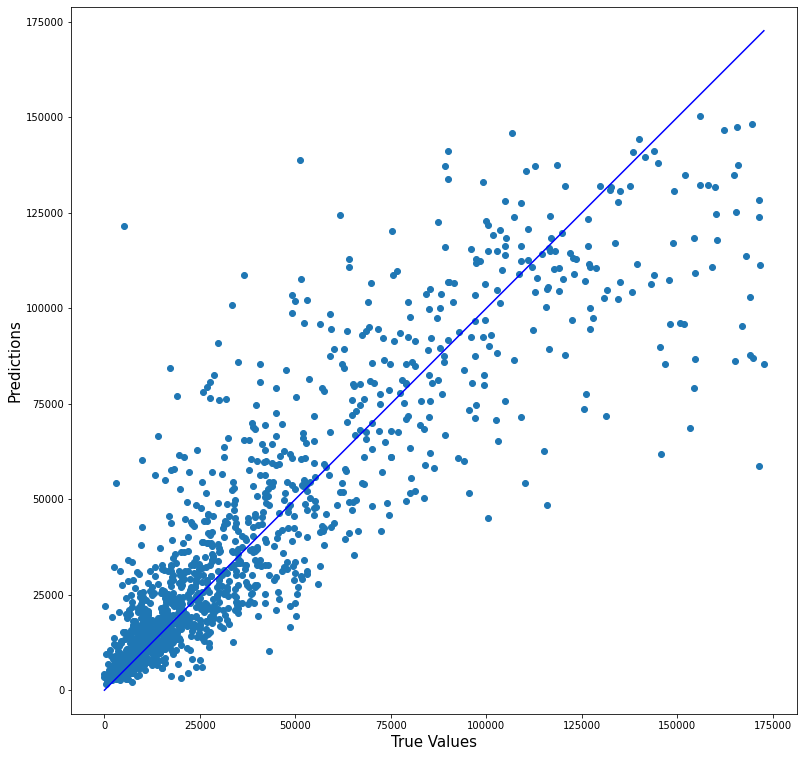

In [15]:
# Visualize the True Values V.S. Predicted Values with the best model Random Forest Regressor and the best hyperparameter

clf = make_pipeline(StandardScaler(),RandomForestRegressor(n_estimators=700, random_state=42))
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

plt.figure(figsize=(13,13))
plt.scatter(y_test, preds)

p1 = max(max(preds), max(y_test['Asking_Price_Adj']))
p2 = min(min(preds), min(y_test['Asking_Price_Adj']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.savefig('Actual V.S. Predicted.png')
plt.show()

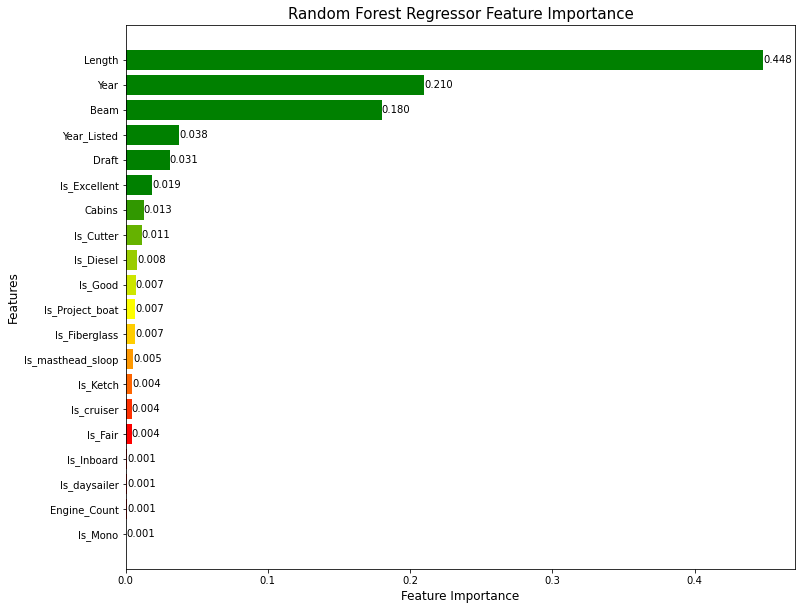

In [16]:
import matplotlib.colors as mcolors

# Plot the feature importances

cv = KFold(5, shuffle=True, random_state=42)

pipe = make_pipeline([('scaler', StandardScaler()), 
                 ('model', RandomForestRegressor(n_estimators=700,random_state=42))])

pipe.fit(X_train, y_train)

importances = pipe.steps[1][1].feature_importances_


df = pd.DataFrame({'features':X_train.columns.values,'feature_importance':pipe.steps[1][1].feature_importances_})

df.sort_values(by=['feature_importance'], ascending=True,inplace=True)

plt.figure(figsize=(12,10))

clist = [(0, "red"), (0.25, "red"), (0.5, "yellow"), (0.75, "green"),(1,"green")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

bar = plt.barh(df['features'],df['feature_importance'],color=[rvb(i/20) for i in range(1,21)])
plt.bar_label(bar, fmt='%.3f', label_type='edge')

plt.title('Random Forest Regressor Feature Importance',fontsize=15)
plt.xlabel('Feature Importance',fontsize=12)
plt.ylabel('Features',fontsize=12)
ax.yaxis.set_tick_params(labelsize=10)
plt.savefig('feature importance.png',bbox_inches = 'tight')